# Recherche bibliographique des modèles de propagation du virus


Depuis plusieurs siècles, les virus déciment des populations entières mais nous sommes en mesure de prévoir l'évolution de ces virus avec de plus en plus de précision à court et long termes. 
Plusieurs facteurs sont à prendre en compte afin d’arriver à l'élaboration d'un modèle de propagation, comme par exemple le taux d'infection, le taux de guérison...
Ces modèles sont de plus en plus difficiles à mettre en œuvre compte tenu du nombre de paramètres à prendre en compte comme la situation géographique, les moyens sanitaires, la fréquence de contact entre différentes personnes etc.
 Il existe différents modèles permettant de représenter l'évolution des virus dont les modèles de Bernoulli,Reed-Frost et SIR. Ils se différencie notamment par leur hyposthèse et leur date de création.

## 1) Modèle de Bernoulli

Le modèle de Bernoulli a vu le jour en 1760, dans un mémoire de l’Académie des Sciences de Paris, D.Bernoulli propose une modélisation d’une épidémie de variole pour tenter de savoir si l’inoculation de la maladie présente  plus d’avantages que derisques pour la population sujette à cette épidémie. 
Il faut savoir qu’à l’époque les vaccins n’existent pas, la technique d’inoculation est très controversée et la maladie fait des ravages.

## 2) Modèle Reed-Frost

Le modèle Reed-Frosta vu le jour dans les année 1920.
Il s'agit de deux chercheurs en médecine à l’université de John’s Hopkins, Lowell Reed et Wade Hampton Frost qui ont développé un modèle  qui a pour but de répondre à ce type de question : On introduit un individu atteint dans une population : que va-t-il se passer?
Cette modélisation se base donc sur l'évolution de l'épidémie à travers une personne introduite dans la population.

### Dans notre cas on cherche une modélisation toujours utilisée de nos jours qui se base sur l'évolution de la population totale et qui permet de mieux appréhender l'avancée de l'épidémie, si épidémie il y a.

## Modèle SIR

Le modèle SIR :
- S : personnes susceptibles d'être infectées.
- I : personnes infectées.
- R : personnes immunisées, c'est-à-dire les personnes retirées du groupe de la chaîne de transmission.
Remarque, on peut modifier ce modèle en introduisant une quatrième catégorie de personne E = Exposés.
Le modèle se nomme alors le moèdele SEIR.

Ce modèle a été inventé en 1924 par 3 chercheurs : Soper, Kermack et McKendrick.
Leur méthode est toujours considérée comme valide. A l'époque, ces chercheurs ont essayé de comprendre pourquoi la grande pandémie de grippe espagnole de 1918 n'avait pas infecté toute la population.
Il est aujourd'hui régulièrement utilisé comme par exemple dans le cas de la grippe A en 2009. C'est pourquoi nous allons utiliser ce modèle pour notre traitement sur le COVID-19.
 
 Il est important de notifier que la véracité de ce modèle dépend du nombre de paramètres, plus les paramètres sont nombreux, plus ce modèle se rapproche de la réalité. 
 
 Dans ce modèles, des simplifications sont faites : On considère une population fermée, c'est à dire qu’il n’y a pas de naissance ni de mort et que le virus choisi ne possède pas de période d'incubation. Cela signifie que de manière constante, la population totale = S+I+R, seulement ce sont les valeur de S, I et R qui ne seront pas les même dans le temps .
 
Voici 3 paramètres de cette modélisation : 
- "bêta" : le taux d'infection 
- "gamma" : le taux de recouvrement/guérison/convalescence
- "R0" : La valeur clé déterminant l'évolution temporelle de l'épidémie. Si X peut contaminer plus d'une personne (Ro >1 ) la maladie va se dévelloper énormément.

Cette méthode est définie par trois équations différentielles qui relient la dérivée des fonctions, dS(t)/dt, dI(t)/dt et dR(t)/dt, aux fonctions elles-mêmes, S(t), I(t) et R(t). Les valeurs de S, I et R sont toujours positives.

- La première, avec un signe « - » car avec le temps ce groupe se réduit. En effet l'épidémie a déjà touché un certain nombre de personnes.La valeur est proportionnelle au nombre d'infectés, au nombre de susceptibles d'être infectés et à β. β représente le taux d'infection c'est à dire le taux de probabilité de transmission du virus et le nombre de contacts entre un sujet infecté et des personnes susceptibles de l’être.

- La deuxième équation décrit l'accroissement du nombre d'infectés au fil du temps. On a la somme du nombre précédent avec le signe « + » pour signifier que le nombre d'infecté croît avec le temps et le second terme, négatif, qui signifie qu'un nombre d'infectés s'immunise. Donc γ représente le taux d'immunisés.

- La troisième équation es défini par le second terme (positif) de l'equation 2. Il représente bien l'accroissement du nombre de retirés c'est à dire le taux d'immunisés. L'épidémie nécessite une chaîne de transmission : des       infectés doivent contaminer des susceptibles.

Le système d'équation différentielles fournit par le modèle SIR n'est pas linéaire, il est donc mathématiquement impossible (ou très difficile dans certains cas particuliers) de trouver les solutions exactes. Pour trouver des solutions approchées il faut utiliser l'outil informatique.

Amélioration du modèle: On peut faire varier bêta et gamma.

 Le “fittage” des données est la méthode qui consiste à comparer les données tirées de l'expérience avec un modèle théorique afin de pouvoir définir le modèle théorique le plus proche de la réalité observée. Pour cela on définit une distance entre deux courbes et on essaye de minimiser cette distance en faisant varier les paramètres du modèle théorique. Dans le cas du modèle SIR simple on ferra varier bêta et gamma jusqu'à obtenir le meilleur modèle possible.

# Prédiction de la propagation du virus


### A ce stade de l'épidémie , tout le monde souhaite faire des prédiction sur l'avancement de ce virus. On souhaiterais savoir où se situe le pic dans le temps  et dans combiend de temps l'épidémie est suceptible de se terminer. 


### On va donc tenter d'appliquer un modèle de prédiction sur notre pays : la France

Installation et importation des packages utiles

In [4]:
!pip install lmfit

In [9]:
import os
from datetime import date, timedelta

import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from lmfit import Model
import matplotlib.pyplot as plt
#from google.colab import files

In [14]:
# Racine des fichiers quotidiens
BASE_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{}.csv' 

# Date de disponibilité des fichiers
START_DATE = date(2020, 1, 22) 
END_DATE = date(2020, 3, 20)

# Répertoire de sauvergarde des fichiers bruts 
RAWFILES_DIR = '../data/RAW/'
PROCESSED_DIR = '../data/PROCESSED/'

# Fichier principal
ALL_DATA_FILE = 'all_data.csv'

#TODO: A remplacer par la lecture du fichier env.yaml

In [18]:
delta = END_DATE - START_DATE       # as timedelta

for i in range(delta.days + 1):
    day = START_DATE + timedelta(days=i)
    day_label = day.strftime("%m-%d-%Y")
    #print(day_label)
    virus_df = pd.read_csv(BASE_URL.format(day_label), sep=',', parse_dates=['Last Update'])
    virus_df.to_csv(os.path.join(RAWFILES_DIR, day_label + '.csv'), index=False)


In [19]:
import glob

df_list = []

# Lecture des fichiers récupérés et sélection de ceux qui ont une lat / long
for file in glob.glob(os.path.join(RAWFILES_DIR, '*.csv')):
    virus_df = pd.read_csv(file, sep=',')
    if 'Latitude' in virus_df.columns and 'Longitude' in virus_df.columns:
        df_list.append(virus_df)

all_df = pd.concat(df_list)

# Création d'une table de références pour les lat/long
(all_df[['Province/State', 'Country/Region', 'Latitude', 'Longitude']]
 .drop_duplicates(subset=['Province/State', 'Country/Region'])
 .sort_values(by=['Country/Region', 'Province/State'])
 .to_csv(os.path.join(PROCESSED_DIR, 'lat_long_table.csv'), index=False)
)

In [20]:
data_catalog = {
    'Last Update': ['<M8[ns]'],
    'Confirmed': ['float64', 'int64'],
    'Deaths': ['float64', 'int64'],
    'Recovered': ['float64', 'int64'],
    'Latitude': ['float64'],
    'Longitude': ['float64'],
}

In [21]:
df_list = []
latlong_df = pd.read_csv(os.path.join(PROCESSED_DIR, 'lat_long_table.csv'))

# Lecture des fichiers récupérés et sélection de ceux qui ont une lat / long
for file in glob.glob(os.path.join(RAWFILES_DIR, '*.csv')):
    virus_df = pd.read_csv(file, sep=',', parse_dates=['Last Update'])
    if not('Latitude' in virus_df.columns and 'Longitude' in virus_df.columns):
        virus_df = virus_df.merge(latlong_df, on=['Province/State', 'Country/Region'], how='left')
        
    for field, types in data_catalog.items():
        assert virus_df[field].dtypes in types, f"Bad type for {field} in {file}"
        
    df_list.append(virus_df.assign(source=os.path.basename(file)))

all_df = pd.concat(df_list)

# Sauvegarde de la table totale
all_df.to_csv(os.path.join(PROCESSED_DIR, 'all_data.csv'), index=False)

In [22]:
# Répertoire du fichier de données
PROCESSED_DIR = '../data/processed/'

# Table principale
ALL_DATA_FILE = 'all_data.csv'

In [23]:
epidemie_df = (pd.read_csv(os.path.join(PROCESSED_DIR, ALL_DATA_FILE), parse_dates=['Last Update'])
               .assign(day=lambda _df: _df['Last Update'].dt.date))

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [26]:
%matplotlib inline

In [27]:
france_df = (epidemie_df[epidemie_df['Country/Region'] == 'France']
             .drop_duplicates(subset=['Province/State', 'day'])
             .groupby(by=['Country/Region', 'day'])
             .agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
             .reset_index()
            )

Data pour la France , et graph des données existantes

In [28]:
yfrance= france_df['Confirmed']

<class 'numpy.float64'>
<class 'numpy.int32'>


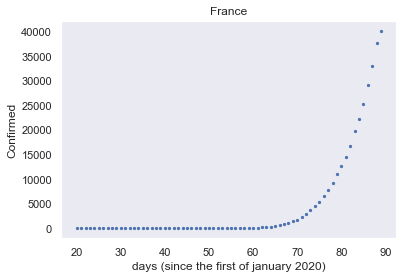

In [29]:
yFrance = np.array([0, 0, 0, 0, 2, 3, 3, 3, 4, 5, 5, 5 ,6 ,6 ,6 ,6 ,6 ,6 ,6 , 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 18, 36, 57, 100, 130, 178, 191, 285, 423, 653, 949, 1126, 1412, 1781, 2281, 2876, 3661, 4499, 5421, 6633, 7730, 9134, 10995, 12612, 14459, 16689, 19856, 22302, 25233, 29155, 32964, 37575, 40174])
xFrance = np.linspace(1, yFrance.size, yFrance.size)
print (type(xFrance[0]))
print (type(yFrance[0]))
plt.scatter(xFrance+19, yFrance, s=5)
plt.xlabel('days (since the first of january 2020)')
plt.ylabel('Confirmed')
plt.title('France')
plt.grid()
plt.show()

Modèle optimiste basé sur les données francaises uniquement 

In [7]:
def model_opt(x, lam, alpha, n):
    return lam / (1 + np.exp(-alpha*(x-n)))
gmodel_opt = Model(model_opt)
params_opt = gmodel_opt.make_params(lam=81000, alpha=0.2, n=20)

 Modèle pessimiste basé sur les données francaises et taux de propagation chinois

In [8]:
def model_pes(x, lam, n):
    return lam / (1 + np.exp(-0.21600181*(x-n)))
gmodel_pes = Model(model_pes)
params_pes = gmodel_opt.make_params(n=20)

Optimisation pour la France

In [9]:
# Optimistic
result_opt = gmodel_opt.fit(yFrance, x=xFrance, lam=200000, alpha=0.2, n=60)
print(result_opt.fit_report())

#print (result_opt.params['lam'].stderr)
#print (result_opt.params['alpha'].stderr)
#print (result_opt.params['n'].stderr)

lam = result_opt.params['lam'].value
alpha = result_opt.params['alpha'].value
n = result_opt.params['n'].value

lam_opt = result_opt.params['lam'].value - result_opt.params['lam'].stderr
alpha_opt = result_opt.params['alpha'].value - result_opt.params['alpha'].stderr
n_opt = result_opt.params['n'].value # + result_opt.params['n'].stderr

lam_pes = result_opt.params['lam'].value + result_opt.params['lam'].stderr
alpha_pes = result_opt.params['alpha'].value + result_opt.params['alpha'].stderr
n_pes = result_opt.params['n'].value # - result_opt.params['n'].stderr


print ("* Nombre total de cas estimé à la fin de l'épidémie : min=" + np.round(lam_opt,1).astype(str) + " ; max= " + np.round(lam_pes,1).astype(str))
print ("* Coefficient de propagation : min=" + np.round(1/alpha_opt,2).astype(str) + " ; max= " + np.round(1/alpha_pes,2).astype(str))
print ("* Décalage avec la Chine en jours : min=" + np.round(n_opt,1).astype(str) + " ; max= " + np.round(n_pes,1).astype(str))
print ("\n")
print ("* Estimated total cases at the end: min=" + np.round(lam_opt,1).astype(str) + " ; max= " + np.round(lam_pes,1).astype(str))
print ("* Propagation rate: min=" + np.round(1/alpha_opt,2).astype(str) + " ; max= " + np.round(1/alpha_pes,2).astype(str))
print ("* Delay with China: min=" + np.round(n_opt,1).astype(str) + " days ; max= " + np.round(n_pes,1).astype(str) + " days")

[[Model]]
    Model(model_opt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 35
    # data points      = 70
    # variables        = 3
    chi-square         = 3426088.20
    reduced chi-square = 51135.6448
    Akaike info crit   = 761.890412
    Bayesian info crit = 768.635898
[[Variables]]
    lam:    78560.2753 +/- 2754.80774 (3.51%) (init = 200000)
    alpha:  0.19321212 +/- 0.00279798 (1.45%) (init = 0.2)
    n:      69.6786312 +/- 0.33887600 (0.49%) (init = 60)
[[Correlations]] (unreported correlations are < 0.100)
    C(lam, n)     =  0.996
    C(alpha, n)   = -0.943
    C(lam, alpha) = -0.921
* Nombre total de cas estimé à la fin de l'épidémie : min=75805.5 ; max= 81315.1
* Coefficient de propagation : min=5.25 ; max= 5.1
* Décalage avec la Chine en jours : min=69.7 ; max= 69.7


* Estimated total cases at the end: min=75805.5 ; max= 81315.1
* Propagation rate: min=5.25 ; max= 5.1
* Delay with China: min=69.7 days ; max= 69.7 days


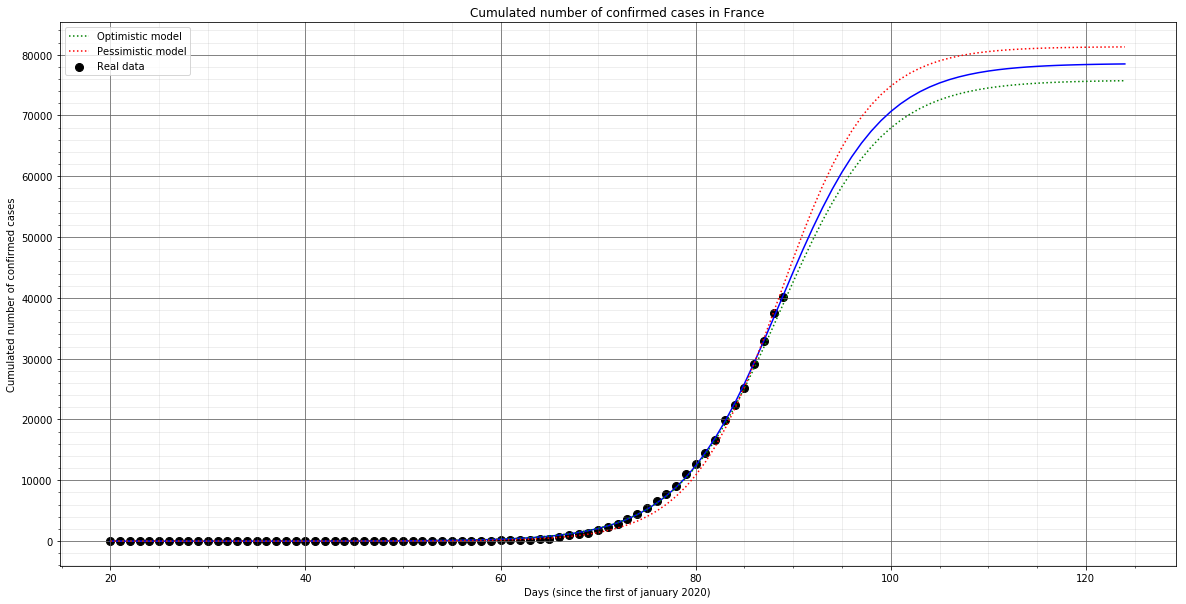

In [11]:
xFranceProjected = np.linspace(1, 105, 105)
yFranceProjected = model_opt(xFranceProjected, lam, alpha, n) 
yFranceProjected_opt = model_opt(xFranceProjected, lam_opt, alpha_opt, n_opt) 
yFranceProjected_pes = model_pes(xFranceProjected, lam_pes, n_pes) 

plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(xFrance+19, yFrance, s=64, color = 'k', label='Real data')
#plt.plot(xFrance, result.init_fit, 'k--', label='initial fit')
plt.plot(xFranceProjected+19, yFranceProjected, 'b-')
plt.plot(xFranceProjected+19, yFranceProjected_opt, 'g:', label='Optimistic model')
plt.plot(xFranceProjected+19, yFranceProjected_pes, 'r:', label='Pessimistic model')
plt.xlabel('Days (since the first of january 2020)')
plt.ylabel('Cumulated number of confirmed cases')
plt.title('Cumulated number of confirmed cases in France')
plt.legend(loc='best')

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

#plt.show()
plt.savefig('covid-19-prediction-for-france-03-29-2020.png',dpi=300)
#print (yFranceProjected_opt)
#print (yFranceProjected_pes)

Définition du pic en France

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.]
[   0    0    0    0    2    1    0    0    1    1    0    0    1    0
    0    0    0    0    0    5    0    0    0    0    0    0    1    0
    0    0    0    0    0    0    0    0    2    4   18   21   43   30
   48   13   94  138  230  296  177  286  369  500  595  785  838  922
 1212 1097 1404 1861 1617 1847 2230 3167 2446 2931 3922 3809 4611 2599]


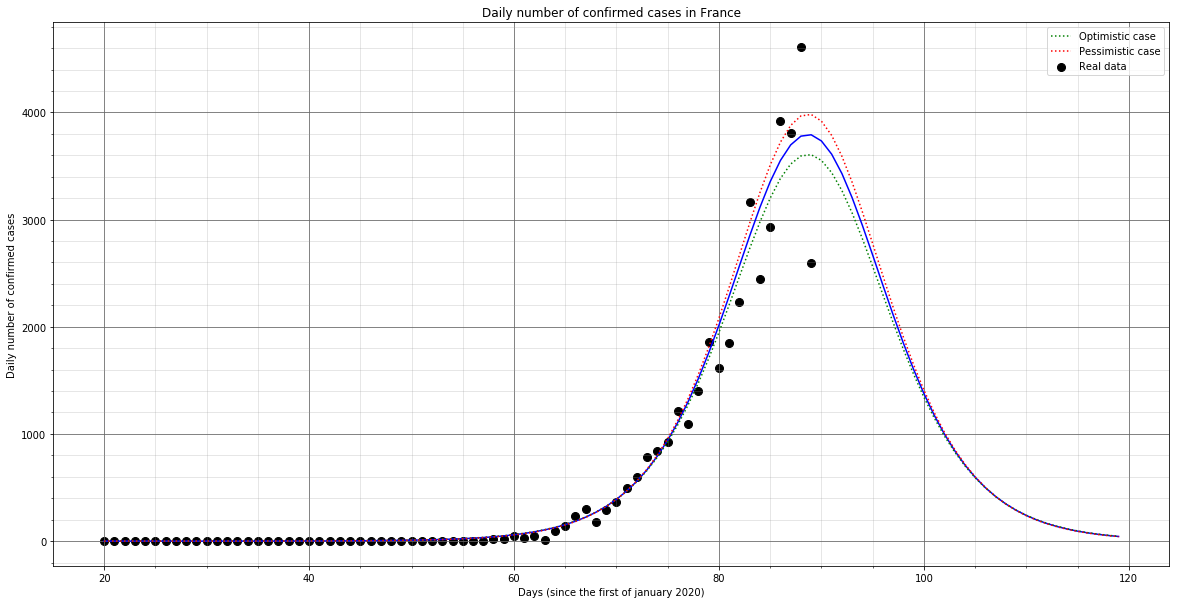

In [13]:
def peak(x, lam, alpha, n):
    return lam*alpha*np.exp(-alpha*(x-n)) / (1 + np.exp(-alpha*(x-n)))**2

## Real data
yFrancePeak = np.diff(yFrance)
yFrancePeak = np.insert(yFrancePeak, 0, 0, axis=0)
print(xFrance)
print(yFrancePeak)

xFrancePeak = np.linspace(1, 100, 100)
yFrancePeak_avg = peak(xFrancePeak, lam, alpha, n ) 
yFrancePeak_opt = peak(xFrancePeak, lam_opt, alpha_opt, n_opt ) 
yFrancePeak_pes = peak(xFrancePeak, lam_pes, alpha_pes, n_pes )

plt.clf()
plt.scatter(xFrance+19, yFrancePeak, s=64, color = 'k', label='Real data')
plt.plot(xFrancePeak+19, yFrancePeak_avg, 'b-')
plt.plot(xFrancePeak+19, yFrancePeak_opt, 'g:', label='Optimistic case')
plt.plot(xFrancePeak+19, yFrancePeak_pes, 'r:', label='Pessimistic case')

plt.xlabel('Days (since the first of january 2020)')
plt.ylabel('Daily number of confirmed cases')
plt.title('Daily number of confirmed cases in France')
plt.legend(loc='best')

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)

#plt.show()
plt.savefig('covid-19-peak-for-france-03-29-2020.png',dpi=300)
#files.download('covid-19-peak-for-france-03-29-2020.png') 

On donne ici la valeur des points correspondant à la courbe optimiste

In [21]:
for x in yFranceProjected_opt:
  print (x)

0.15858585929036786
0.19184923908769536
0.2320895905577703
0.28077031894341636
0.3396617710931054
0.41090561273250603
0.4970927071005314
0.6013573260333476
0.7274911180141465
0.8800809754348237
1.0646758113254657
1.2879883054990546
1.5581389493616666
1.8849512533563548
2.280308836431461
2.758587359762492
3.3371769776554925
4.037114254060814
4.883846450150465
5.908155867357732
7.147277699806657
8.646251812486126
10.459557259070035
12.653088475290488
15.30654427486704
18.516315444220087
22.398974362883095
27.09549123658767
32.776326881974455
39.64758231158073
47.958421509612876
58.01002674522065
70.16639661884186
84.86735692366618
102.64422448259243
124.13864545391617
150.1252229913335
181.53865487946322
219.50621920191458
265.3865730546027
320.8159611740695
387.7630597477546
468.59379165180286
566.147520783472
683.8260311907399
825.696571204323
996.6099214249705
1202.3338267348472
1449.7010783228666
1746.7698605585406
2102.9914618699067
2529.376821545474
3038.6483640379
3645.35691995536